In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm.zip")
biciSosta = geopandas.read_file("/content/drive/MyDrive/bike_areesosta.zip")
stradario = geopandas.read_file("/content/drive/MyDrive/stradario.csv")

In [ ]:
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [32]:
biciSosta

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242.0,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242.0,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242.0,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242.0,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [69]:
stradario

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,geometry
0,4377,VIA,8 OTTOBRE 2001,12,,138,916,4,None
1,3123,VIA,A.DEL SARTO,1,,129,665,3,None
2,3123,VIA,A.DEL SARTO,3,,129,665,3,None
3,3123,VIA,A.DEL SARTO,4,,129,665,3,None
4,3123,VIA,A.DEL SARTO,5,,129,665,3,None
...,...,...,...,...,...,...,...,...,...
51318,6318,VIA,ZURIGO,24,,147,394,7,None
51319,6318,VIA,ZURIGO,24,4,147,394,7,None
51320,6318,VIA,ZURIGO,25,,147,1412,6,None
51321,6318,VIA,ZURIGO,28,,147,539,7,None


- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [5]:
biciSosta['id_via'] = pd.to_numeric(biciSosta['id_via'])
stradario['CODICE_VIA'] = pd.to_numeric(stradario['CODICE_VIA'])

In [6]:
stradario_sd = stradario.drop_duplicates(subset = ["CODICE_VIA"])

In [7]:
stradario_sd = stradario_sd.drop(columns=["geometry"])

In [8]:
stradario_sd

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,,138,916,4
1,3123,VIA,A.DEL SARTO,1,,129,665,3
27,3135,VIA,ABAMONTI GIUSEPPE,1,,129,113,3
30,2558,VIA,ABANO,3,,131,1565,3
41,1295,VIA,ABBA GIUSEPPE C,4,,158,1184,9
...,...,...,...,...,...,...,...,...
51220,5390,VIA,ZUCCARO,2,,146,1028,6
51226,1254,VIA,ZUCCOLI LUCIANO,6,,125,1608,2
51235,5302,VIA,ZUMBINI BONAVENTURA,6,,143,1008,6
51251,1216,VIA,ZURETTI G.,1,,125,1605,2


In [9]:
areeLista = pd.merge(biciSosta, stradario_sd, how = "left", left_on = ['id_via'], right_on = ['CODICE_VIA'])
areeLista

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1,,142,2066,5
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1,,161,1216,9
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3,,153,2117,7
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1,,149,444,8
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5,,147,1032,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242.0,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530),1242.0,VIA,CANDIANI G.,5,,158,1954,9
1518,3233,1242.0,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584),1242.0,VIA,CANDIANI G.,5,,158,1954,9
1519,3234,1242.0,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568),1242.0,VIA,CANDIANI G.,5,,158,1954,9
1520,3235,1242.0,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532),1242.0,VIA,CANDIANI G.,5,,158,1954,9


In [10]:
areeLista[["AREA","DESCRIZIONE_VIA","CIVICO","stalli_tot"]]

,AREA,DESCRIZIONE_VIA,CIVICO,stalli_tot
0,PZA,ABBIATEGRASSO,1,15
1,VLE,AFFORI,1,10
2,VIA,AIRAGHI GAETANO,3,5
3,VIA,ALCUINO,1,5
4,VIA,ALLODOLA,5,4
...,...,...,...,...
1517,VIA,CANDIANI G.,5,12
1518,VIA,CANDIANI G.,5,10
1519,VIA,CANDIANI G.,5,12
1520,VIA,CANDIANI G.,5,58


- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [11]:
areaListQua = geopandas.sjoin(areeLista, quartieri, op = "within", how = "left")
areaListQua.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1,,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1,,161,1216,9,69.0,80.0,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3,,153,2117,7,11.0,62.0,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1,,149,444,8,2.0,67.0,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5,,147,1032,6,87.0,53.0,LORENTEGGIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8442.031660,2.644338e+06,176.0


In [12]:
areaListQua[["stalli_tot","DESCRIZIONE_VIA","CIVICO", "NIL"]]

,stalli_tot,DESCRIZIONE_VIA,CIVICO,NIL
0,15,ABBIATEGRASSO,1,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,10,AFFORI,1,AFFORI
2,5,AIRAGHI GAETANO,3,QUINTO ROMANO
3,5,ALCUINO,1,PORTELLO
4,4,ALLODOLA,5,LORENTEGGIO
...,...,...,...,...
1517,12,CANDIANI G.,5,BOVISA
1518,10,CANDIANI G.,5,BOVISA
1519,12,CANDIANI G.,5,BOVISA
1520,58,CANDIANI G.,5,BOVISA


- i nomi dei quartieri in cui non ci sono aree di sosta;

In [13]:
quaNoSos = quartieri[~quartieri.NIL.isin(areaListQua["NIL"])]
quaNoSos[["NIL"]]

,NIL
1,TRENNO
5,FIGINO
22,STEPHENSON
23,CANTALUPA
24,QUINTOSOLE
28,PARCO BOSCO IN CITTA'
36,ASSIANO
46,RONCHETTO DELLE RANE
48,MONLUE' - PONTE LAMBRO
54,CHIARAVALLE


- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

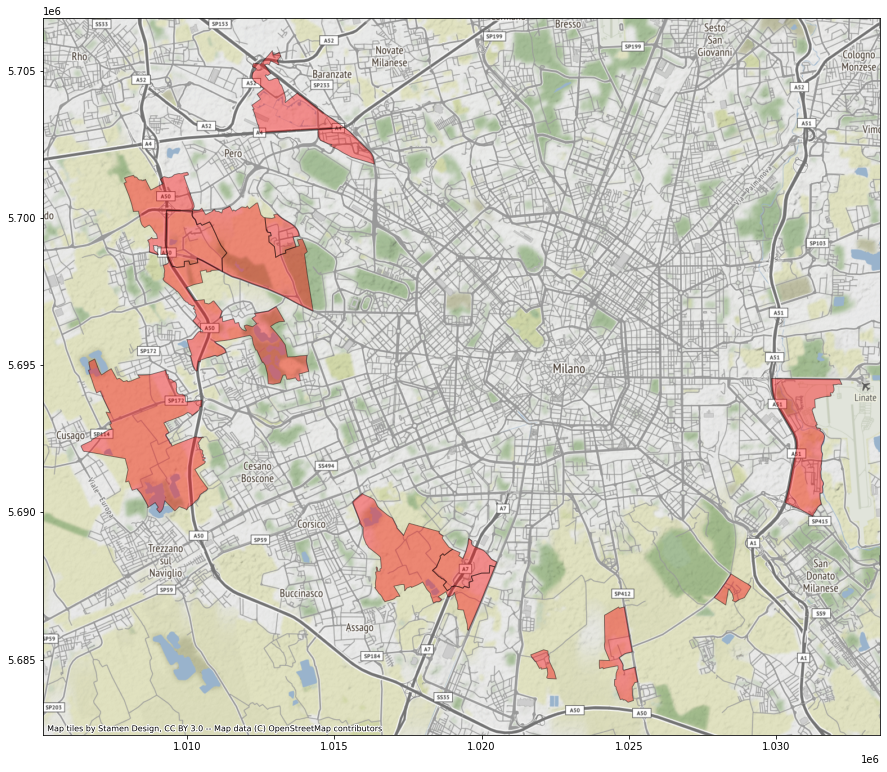

In [15]:
ax = quaNoSos.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
contextily.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [50]:
groupbyGeo = areaListQua.groupby("NIL").count()[["id_via"]].reset_index()
quaPiuAree = groupbyGeo[groupbyGeo.id_via == groupbyGeo.id_via.max()]
quaPiuAree

,NIL,id_via
17,DUOMO,136


In [51]:
quaMap = pd.merge(quartieri, quaPiuAree, how = "inner", on = "NIL")
quaMap

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,id_via
0,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ...",136


- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

In [ ]:
ax = quaMap.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
contextily.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [55]:
mediaAree = groupbyGeo.id_via.mean()
mediaAree

19.894736842105264

In [ ]:
quaMin = groupbyGeo[groupbyGeo.id_via < mediaAree]
quaMin

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [58]:
quaMin = pd.merge(quartieri, quaMin, how = "inner", on = "NIL")
quaMin.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,id_via
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...",6
1,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...",18
2,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...",5
3,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...",3
4,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,"POLYGON ((9.13481 45.52095, 9.13481 45.52094, ...",16


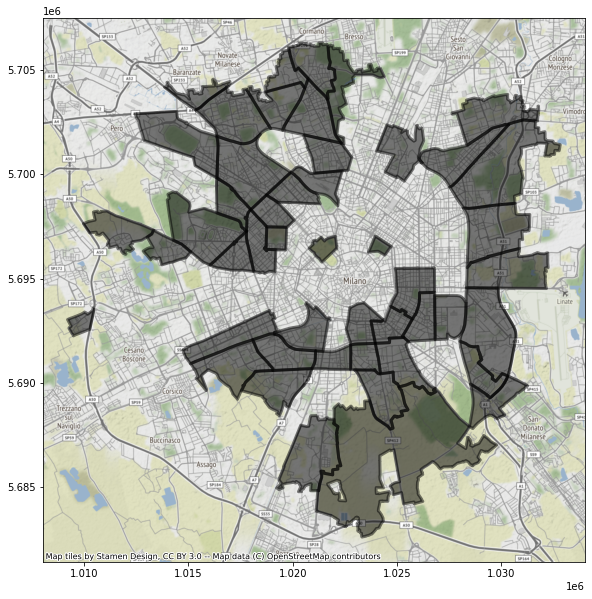

In [60]:
ax = quaMin.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5, linewidth = 3)
contextily.add_basemap(ax)

- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

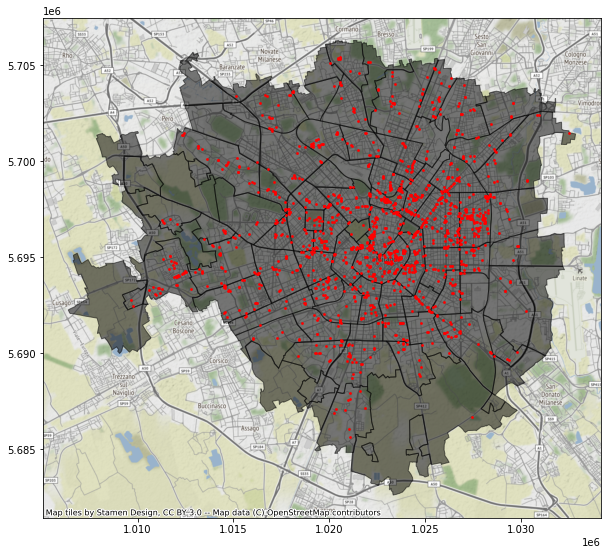

In [62]:
ax = quartieri.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5)
areaListQua.to_crs(epsg =3857).plot(color = "red", ax = ax, markersize = 3)
contextily.add_basemap(ax)

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

In [75]:
areaQUaFin = areaListQua.groupby('NIL').count().reset_index()
areaQUaFin

,NIL,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,ADRIANO,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,AFFORI,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,31,31,30,31,31,31,31,31,31,31,31,31,30,30,30,30,30,30,30,30,31,31,31,31,31,31,31,31
3,BANDE NERE,21,21,13,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
4,BARONA,14,14,12,14,14,14,14,14,14,14,14,14,12,12,12,12,12,12,12,12,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRIULZO SUPERIORE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72,UMBRIA - MOLISE - CALVAIRATE,16,16,11,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
73,VIGENTINO - Q.RE FATIMA,12,12,10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
74,VILLAPIZZONE - CAGNOLA - BOLDINASCO,14,14,12,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [ ]:
areaQUaFin2 = pd.merge(areaQUaFin, quartieri,  how = "left", on = ['NIL'])
areaQUaFin2

In [65]:
areaQUaFin2.rename(columns = {'geometry_y':'geometry'}, inplace = True)

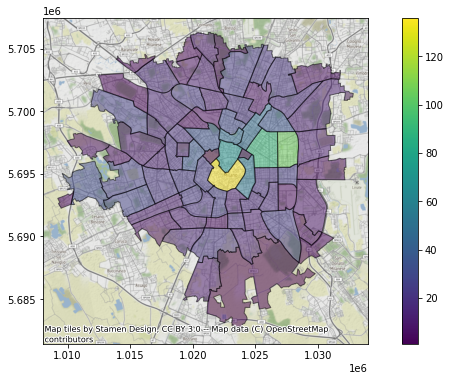

In [67]:
ax = areaQUaFin2.to_crs(epsg = 3857).plot(figsize = (12 , 6), column = "id_via", legend=True, alpha = 0.5, edgecolor = "k")
contextily.add_basemap(ax)

- data una via (inserita dall'utente), avere le aree di sosta di quella via

In [79]:
via = input("Inserisci una via: ")

if via in list(areeLista.DESCRIZIONE_VIA):
  print(areeLista[areeLista["DESCRIZIONE_VIA"] == via][["stalli_tot"]])
else:
  print("La via da te inserita non è presente all'interno del geodataframe")

Inserisci una via: CUFRA
La via da te inserita non è presente all'interno del geodataframe


- dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

In [ ]:
quartiere_input = input("Inserisci il nome di un quartiere: ")

if quartiere_input in list(quartieri.NIL):

  quartiere= quartieri[quartieri["NIL"] == quartiere_input]

  bike_area_quartiere = biciSosta[biciSosta.intersects(quartiere.unary_union)]
  bike_area_quartiere

  ax = quartiere.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3)
  bike_area_quartiere.to_crs(epsg=3857).plot(ax=ax, color= "r")
  contextily.add_basemap(ax)
else:
  print("Il quartiere da te inserito non è presente all'inetrnmo del geodataframe")

- date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;

In [ ]:
from shapely.geometry import Point

longitudine = float(input("Inserisci la longitudine: "))
latitudine = float(input("Inserisci la latitudine: "))
#9.191383, 45.464211 (coordinate del duomo)

punto = Point(longitudine, latitudine)
punto

buffer_punto = punto.buffer(0.0044) # 500 gradi in metri sono 0.0044 metri
aree_sosta_meno500 =  biciSosta[biciSosta.within(buffer_punto)]

ax = aree_sosta_meno500.to_crs(epsg=3857).plot(figsize=(15,15), color= "r")
contextily.add_basemap(ax)